### Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

From the competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).


### Goal for this Notebook:
Show a simple example of an analysis of the Titanic disaster in Python using a full complement of PyData utilities. This is aimed for those looking to get into the field or those who are already in the field and looking to see an example of an analysis done with Python.

#### This Notebook will show basic examples of: 
#### Data Handling
*   Importing Data with Pandas
*   Cleaning Data
*   Exploring Data through Visualizations with Matplotlib

#### Data Analysis
*    Supervised Machine learning Techniques:
    +   Logit Regression Model 
    +   Plotting results
    +   Support Vector Machine (SVM) using 3 kernels
    +   Basic Random Forest
    +   Plotting results

#### Valuation of the Analysis
*   K-folds cross validation to valuate results locally
*   Output the results from the IPython Notebook to Kaggle



#### Required Libraries:
* [NumPy](http://www.numpy.org/)
* [IPython](http://ipython.org/)
* [Pandas](http://pandas.pydata.org/)
* [SciKit-Learn](http://scikit-learn.org/stable/)
* [SciPy](http://www.scipy.org/)
* [StatsModels](http://statsmodels.sourceforge.net/)
* [Patsy](http://patsy.readthedocs.org/en/latest/)
* [Matplotlib](http://matplotlib.org/)

***To run this notebook interactively, get it from my Github [here](https://github.com/agconti/kaggle-titanic). The competition's website is located on [Kaggle.com](http://www.kaggle.com/c/titanic-gettingStarted).***

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

### Data Handling
#### Let's read our data in using pandas:

In [2]:
df = pd.read_csv("data/train.csv") 

Show an overview of our data: 

In [3]:
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Let's take a look:

Above is a summary of our data contained in a `Pandas` `DataFrame`. Think of a `DataFrame` as a Python's super charged version of the workflow in an Excel table. As you can see the summary holds quite a bit of information. First, it lets us know we have 891 observations, or passengers, to analyze here:
    
    Int64Index: 891 entries, 0 to 890

Next it shows us all of the columns in `DataFrame`. Each column tells us something about each of our observations, like their `name`, `sex` or `age`. These colunms  are called a features of our dataset. You can think of the meaning of the words column and feature as interchangeable for this notebook. 

After each feature it lets us know how many values it contains. While most of our features have complete data on every observation, like the `survived` feature here: 

    survived    891  non-null values 

some are missing information, like the `age` feature: 

    age         714  non-null values 

These missing values are represented as `NaN`s.

### Take care of missing values:
The features `ticket` and `cabin` have many missing values and so can’t add much value to our analysis. To handle this we will drop them from the dataframe to preserve the integrity of our dataset.

To do that we'll use this line of code to drop the features entirely:

    df = df.drop(['ticket','cabin'], axis=1) 


While this line of code removes the `NaN` values from every remaining column / feature:
   
    df = df.dropna()
     
Now we have a clean and tidy dataset that is ready for analysis. Because `.dropna()` removes an observation from our data even if it only has 1 `NaN` in one of the features, it would have removed most of our dataset if we had not dropped the `ticket` and `cabin`  features first.



In [4]:
df = df.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values
df = df.dropna() 

For a detailed look at how to use pandas for data analysis, the best resource is Wes Mckinney's [book](http://shop.oreilly.com/product/0636920023784.do). Additional interactive tutorials that cover all of the basics can be found [here](https://bitbucket.org/hrojas/learn-pandas) (they're free).  If you still need to be convinced about the power of pandas check out this wirlwhind [look](http://wesmckinney.com/blog/?p=647) at all that pandas can do. 

### Exploration visuelle des données - fonction df.plot

Dessinez un histogramme qui représente la distribution des survivants - kind='bar'

vivant : 288 , mort 424


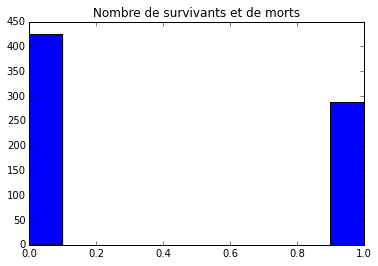

In [101]:
survivant = df['Survived'][df['Survived'] == 1]
nbSurvivant = survivant.count()
rip = df['Survived'][df['Survived'] == 0]
nbMort = rip.count()
print("vivant : {} , mort {}".format(nbSurvivant, nbMort))

t = df['Survived'].as_matrix()
plt.hist(t)
plt.title("Nombre de survivants et de morts")

Dessinez le nombre de morts et de survivants par age - plt.scatter

In [95]:
Age = df['Age'].as_matrix()
Survivant = df['Survived'].as_matrix()

c = zip(Age,Survivant)
print(c)
plt.scatter(Age,Survivant)

[(22.0, 0), (38.0, 1), (26.0, 1), (35.0, 1), (35.0, 0), (54.0, 0), (2.0, 0), (27.0, 1), (14.0, 1), (4.0, 1), (58.0, 1), (20.0, 0), (39.0, 0), (14.0, 0), (55.0, 1), (2.0, 0), (31.0, 0), (35.0, 0), (34.0, 1), (15.0, 1), (28.0, 1), (8.0, 0), (38.0, 1), (19.0, 0), (40.0, 0), (66.0, 0), (28.0, 0), (42.0, 0), (21.0, 0), (18.0, 0), (14.0, 1), (40.0, 0), (27.0, 0), (3.0, 1), (19.0, 1), (18.0, 0), (7.0, 0), (21.0, 0), (49.0, 1), (29.0, 1), (65.0, 0), (21.0, 1), (28.5, 0), (5.0, 1), (11.0, 0), (22.0, 0), (45.0, 0), (4.0, 0), (29.0, 1), (19.0, 0), (17.0, 1), (26.0, 0), (32.0, 0), (16.0, 0), (21.0, 0), (26.0, 0), (32.0, 1), (25.0, 0), (0.82999999999999996, 1), (30.0, 1), (22.0, 0), (29.0, 1), (28.0, 0), (17.0, 1), (33.0, 1), (16.0, 0), (23.0, 1), (24.0, 0), (29.0, 0), (20.0, 0), (46.0, 0), (26.0, 0), (59.0, 0), (71.0, 0), (23.0, 1), (34.0, 1), (34.0, 0), (28.0, 0), (21.0, 0), (33.0, 0), (37.0, 0), (28.0, 0), (21.0, 1), (38.0, 0), (47.0, 0), (14.5, 0), (22.0, 0), (20.0, 0), (17.0, 0), (21.0, 0), (7

TypeError: count() takes exactly one argument (0 given)

Dessinez la distribution des passagers par classe dans le navire - kind='barh'

Dessinez sous forme de courbes la distributions des ages par classe (3 graphiques, 1 par classe)

Voici une manière plus élégante de tracer ces distributions (à l'aide d'une technique de lissage appelée Kernel Density Estimation)

In [ ]:
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')


Voici comment dessiner des histogrammes plus complexes

In [ ]:
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')


    Dessinez le même type de graphique, mais pour représenter la proportion au lieu du nombre

Dessinez par classe, et par sexe, la proportion de survivants et de non survivants. Que pouvez vous en déduire ? 